# Chronic Kidney Disease Predictor

In [26]:
# Important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('chronic_kidney_disease_data.csv')
df

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,80.0,1.020,1.0,0.0,0.81,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.20,1.0,1,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,0.81,1.0,0.0,0.0,148.04,...,38.0,6000.0,4.71,0.0,0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.00,1.0,0.0,0.0,423.00,...,31.0,7500.0,4.71,0.0,1,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.00,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.90,1.0,0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.00,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.60,0.0,0,0.0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,140.00,...,47.0,6700.0,4.90,0.0,0,0.0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,75.00,...,54.0,7800.0,6.20,0.0,0,0.0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,100.00,...,49.0,6600.0,5.40,0.0,0,0.0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,114.00,...,51.0,7200.0,5.90,0.0,0,0.0,1.0,0.0,0.0,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     400 non-null    float64
 1   Bp      400 non-null    float64
 2   Sg      400 non-null    float64
 3   Al      400 non-null    float64
 4   Su      400 non-null    float64
 5   Rbc     400 non-null    float64
 6   Pc      400 non-null    float64
 7   Pcc     400 non-null    float64
 8   Ba      400 non-null    float64
 9   Bgr     400 non-null    float64
 10  Bu      400 non-null    float64
 11  Sc      400 non-null    float64
 12  Sod     400 non-null    float64
 13  Pot     400 non-null    float64
 14  Hemo    400 non-null    float64
 15  Pcv     400 non-null    float64
 16  Wbcc    400 non-null    float64
 17  Rbcc    400 non-null    float64
 18  Htn     400 non-null    float64
 19  Dm      400 non-null    int64  
 20  Cad     400 non-null    float64
 21  Appet   400 non-null    float64
 22  pe

In [4]:
# Identifying the Missing Values
df.isnull().sum()

Age      0
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Pc       0
Pcc      0
Ba       0
Bgr      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Pcv      0
Wbcc     0
Rbcc     0
Htn      0
Dm       0
Cad      0
Appet    0
pe       0
Ane      0
Class    0
dtype: int64

In [5]:
df['Class'].value_counts()

ckd       250
notckd    150
Name: Class, dtype: int64

In [6]:
# Check for Categorical Data
df['Class'] = df['Class'].apply({'notckd':0,'ckd':1}.get)

In [7]:
df['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [8]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,0.810300,0.772625,0.106100,0.055600,148.036900,...,38.883700,8406.121800,4.708275,0.369350,0.34250,0.085450,0.794475,0.190475,0.150375,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,0.308983,0.383751,0.306756,0.228199,74.782634,...,8.151082,2523.219976,0.840315,0.482023,0.47514,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.880000,8406.120000,4.710000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


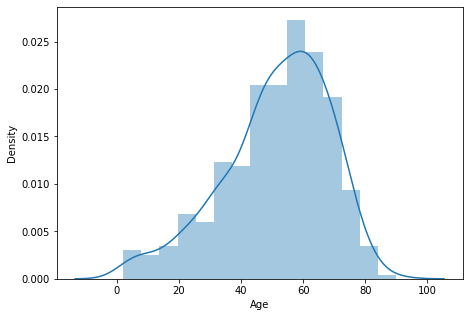

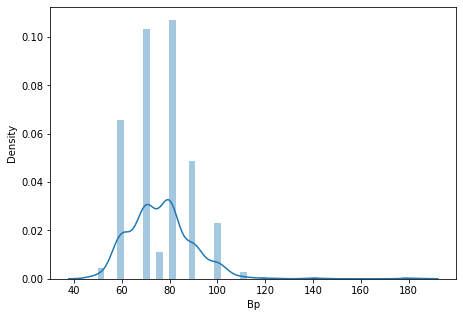

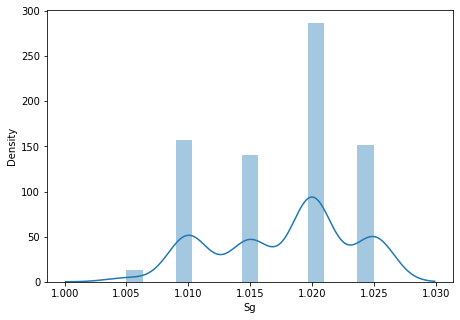

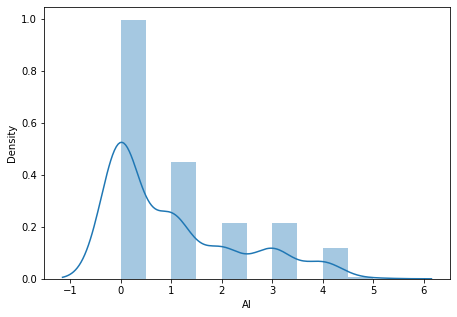

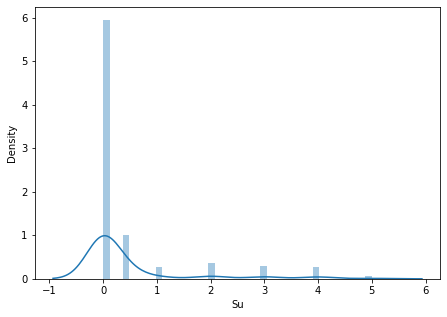

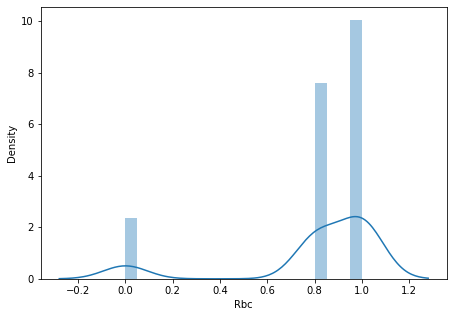

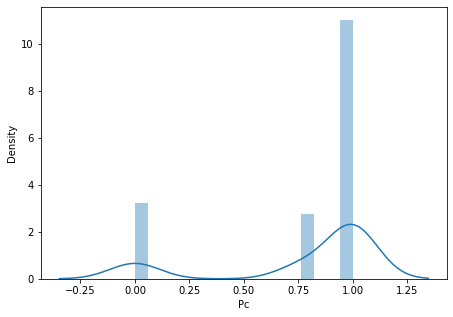

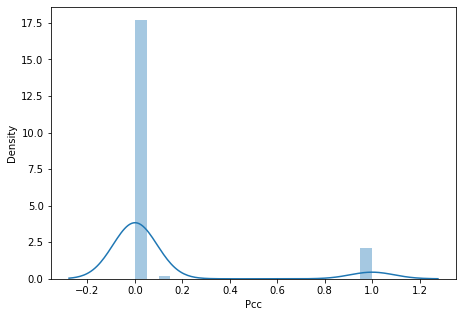

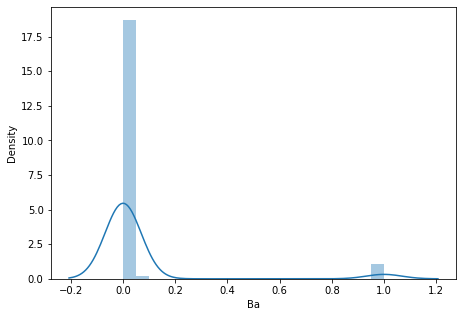

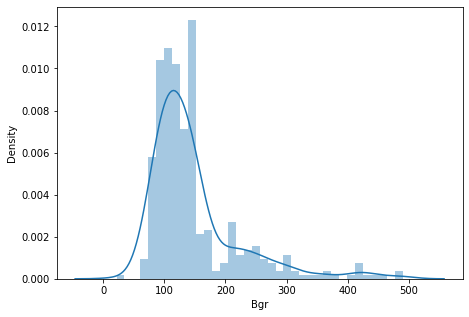

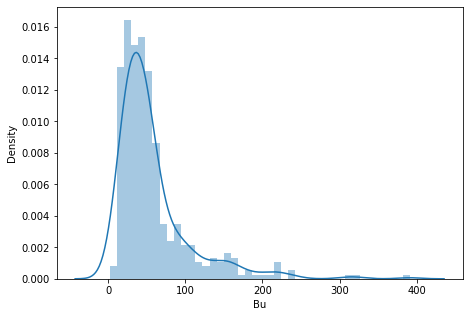

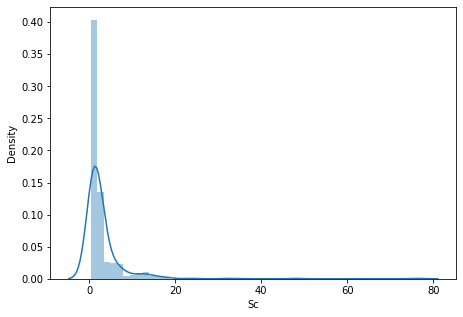

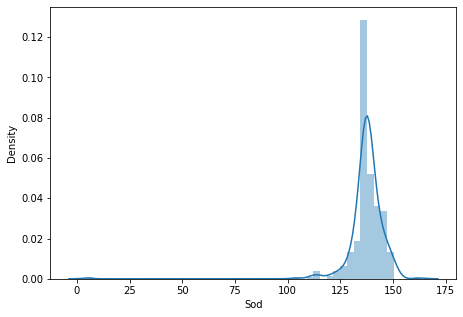

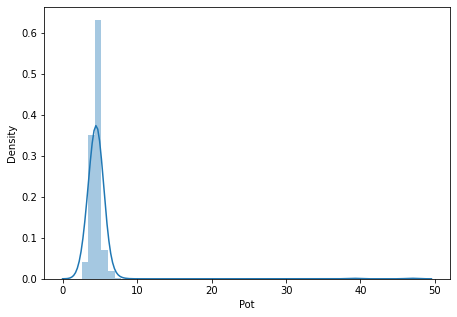

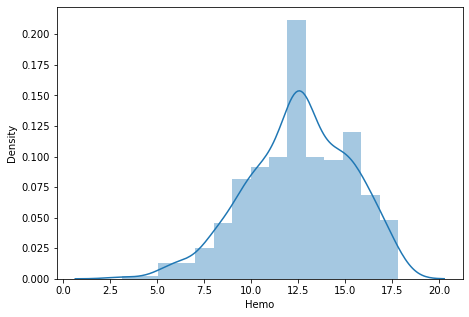

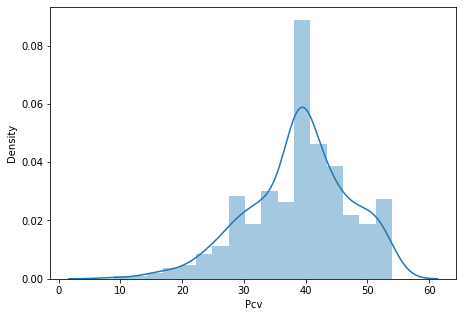

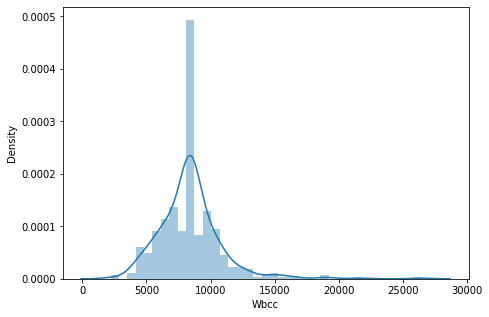

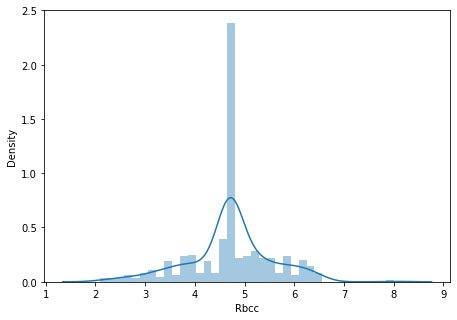

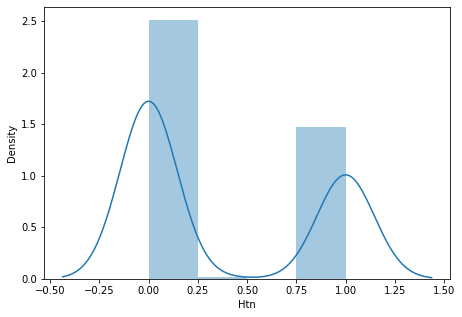

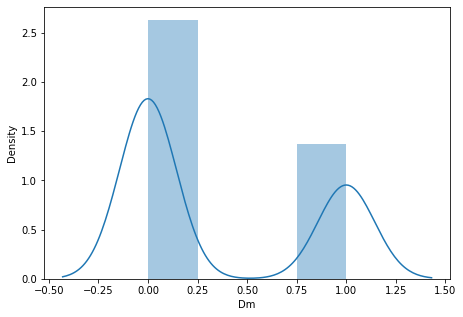

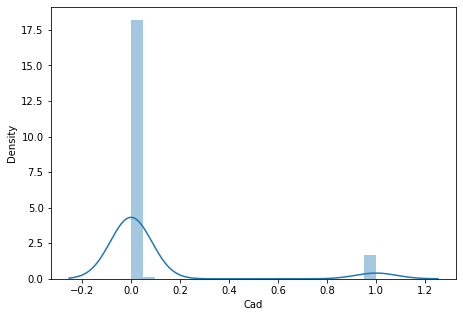

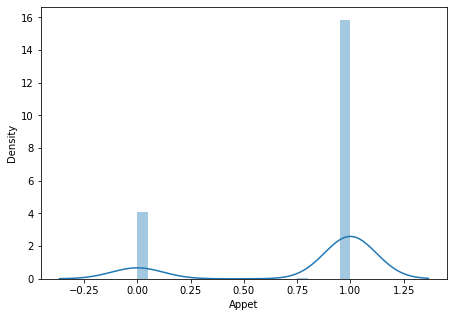

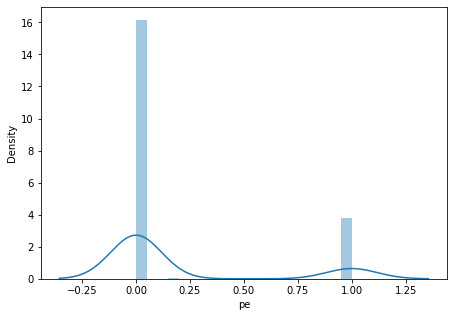

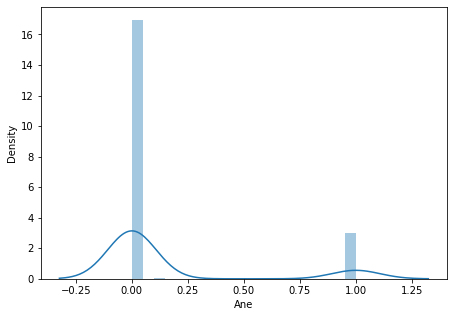

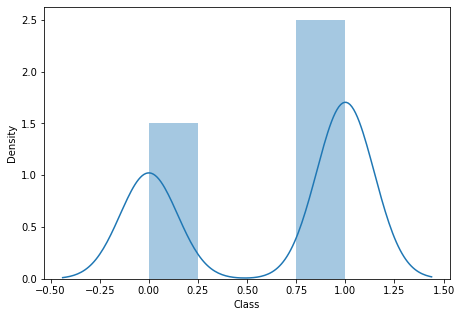

In [9]:
# Outlier Detection
for col in df.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.show()

In [10]:
# Outlier Removal
for col in df.columns:
    if col in list(df.columns)[:-1]:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))       

In [11]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.245835,1.017712,1.016886,0.424168,0.810300,0.772625,0.106100,0.041311,146.299982,...,38.898352,8348.258526,4.706785,0.369350,0.34250,0.078901,0.794475,0.190475,0.150375,0.625000
std,16.974966,12.333748,0.005434,1.271044,0.935649,0.308983,0.383751,0.306756,0.168923,68.332190,...,8.102293,2255.212792,0.832258,0.482023,0.47514,0.257657,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,14.430455,2200.000000,2.187329,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.880000,8406.120000,4.710000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,116.897993,1.025000,4.834255,3.538586,1.000000,1.000000,1.000000,0.740197,372.384803,...,54.000000,15975.781728,7.229221,1.000000,1.00000,0.922948,1.000000,1.000000,1.000000,1.000000


In [12]:
# Separating Features and Label
X = df.iloc[:, [0,1,2,3, 4, 5,6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
Y = df.iloc[:, 24].values

In [13]:
X.shape,Y.shape

((400, 24), (400,))

In [14]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.00606782 0.01157605 0.120337   0.11169599 0.01550472 0.09463872
 0.04592639 0.00859615 0.00096152 0.02042577 0.01199881 0.02044726
 0.01647582 0.00365942 0.09373883 0.06704009 0.00451517 0.04886857
 0.13848165 0.08657481 0.00190028 0.03422844 0.02533316 0.01100757]


In [15]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(10).index)
lst.sort()
lst=[2, 3, 5, 6, 14, 15, 18, 19, 21, 22]

In [16]:
x = X[:,lst]

In [17]:
for i in lst:
    print(df.columns[i])

Sg
Al
Rbc
Pc
Hemo
Pcv
Htn
Dm
Appet
pe


In [18]:
# Split the Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.20, random_state = 42)

In [19]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (320, 10)
X_test shape: (80, 10)
Y_train shape: (320,)
Y_test shape: (80,)


In [20]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(round((accuracy_train*100),2))
        result_test.append(round((accuracy_test*100),2))
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Kidney Disease Dataset Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False)

,Accuracy Training Set,Accuracy Testing Set,Models
1,100.00,100.00,Decision Tree Classifier
2,100.00,100.00,AdaBoost Classifier
4,100.00,100.00,Random Forest Classifier
5,100.00,100.00,Gradient Boosting Classifier
0,97.50,98.75,Logistic Regression
6,100.00,98.75,XGBoost
9,100.00,98.75,LightGBM
8,96.88,96.25,K-Nearest Neighbors Classifier
3,92.81,95.00,Support Vector Machine
7,95.00,95.00,Naive Bayes


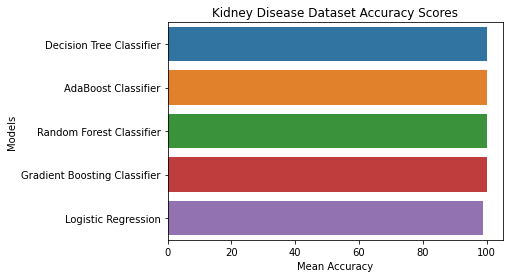

In [21]:
# Modeling: Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(max_depth=5,random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(random_state = 0),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(eval_metric='logloss'),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 98.75%
Precision: 1.0
Recall: 0.98
F1 Score: 0.99


Text(16.5, 0.5, 'Predicted Label')

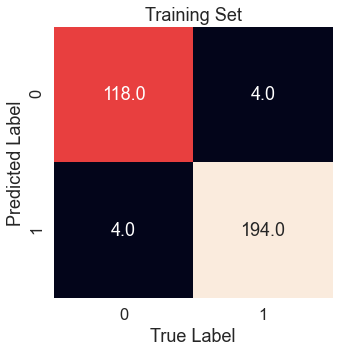

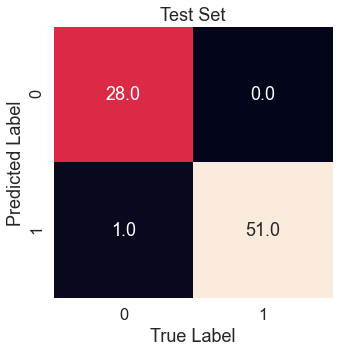

In [22]:
# Best Performing Model (LogisticRegression becuase the other models are overfitted)
classifier =  LogisticRegression(random_state = 30)
model = classifier.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred2 = model.predict(X_train)

# Evaluating using metrics
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
print("Accuracy: " +str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))

# Confusion Matrix
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_train, Y_pred2),annot=True,cbar=False,fmt=".1f")
plt.title('Training Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.title('Test Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [27]:
print(model)

LogisticRegression(random_state=30)


In [24]:
# Saving Model with pickle
import pickle
pickle.dump(model,open(r'chronic_kidney_disease_model.pkl','wb'))